In [47]:
using Revise
using ConvexHullPricing
using Plots
using DataFrames
using Random
using JuMP, Gurobi, LinearAlgebra
using JLD2

N_ITER = 100
const PCU = ConvexHullPricing.Optimizer.PCU
const PCD = ConvexHullPricing.Optimizer.PCD
const PC = abs(PCU) + abs(PCD)
const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer

ConvexHullPricing.Optimizer

In [48]:
ThermalGen = ConvexHullPricing.Utilitaries.ThermalGen(
    MinRunCapacity = [6],
    MaxRunCapacity = [16],
    RampUp = [5],
    RampDown = [5],
    StartUp = [6],
    ShutDown = [6],
    UpTime = [1],
    DownTime = [1],
    NoLoadConsumption = [10],
    MarginalCost = [53],
    FixedCost = [30],
)
instance = ConvexHullPricing.Utilitaries.Instance(
    LostLoad = 3000,
    Load = [6 11 16 11 11 16 11 16 20],
    ThermalGen = ThermalGen
)
LP_Relax = UT.LP_Relaxation(instance)
ObjM = UT.Matching(instance).Obj

-331188.0

In [3]:
instance = UT.load_data("C:\\Users\\Sofiane\\Desktop\\ConvexHullPricing\\data\\ca\\2015-03-01_reserves_5.json")
LP_Relax = UT.LP_Relaxation(instance)
ObjM = UT.Matching(instance).Obj

-3.115031812256126e9

In [53]:
xstar, itblm, fitblm = OPT.BundleLevelMethod(instance, LP_Relax, N_ITER, .8)

([-95.29905928455031, 198.5827553466611, 481.5270699779177, -66.00091365771101, -67.87591365771101, 481.5270699779177, 46.01010410494803, 209.10220936810094, 2999.9999999171123], [[79.5625, 89.25, 88.0, 86.125, 84.25, 88.0, 84.25, 86.125, 3000.0], [-242.87171052631362, -71.96710526315775, 88.0, -75.0921052631578, -76.96710526315769, 88.0, -76.96710526315769, 86.125, 2484.105263157893], [-95.29905928455031, 198.5827553466611, 481.5270699779177, 195.4577553466611, 193.5827553466611, 481.5270699779177, 46.01010410494803, 209.10220936810094, 2582.4870306522257], [-95.29905928455031, 198.5827553466611, 481.5270699779177, -66.00091365771101, -67.87591365771101, 481.5270699779177, 46.01010410494803, 209.10220936810094, 2791.6539658557226], [-95.29905928455031, 198.5827553466611, 481.5270699779177, -66.00091365771101, -67.87591365771101, 481.5270699779177, 46.01010410494803, 209.10220936810094, 2833.3231726845697], [-95.29905928455031, 198.5827553466611, 481.5270699779177, -66.00091365771101, 

In [54]:
xsg, itsg, fsg = OPT.lastSubgradientMethod(instance, LP_Relax, N_ITER, 100)

([26.61354086124164, 76.01328060118206, 164.0670216777667, 52.46929620071061, 52.11394091172393, 139.418239655135, 50.0848882305283, 90.18283074995755, 3000.0], [[79.5625, 89.25, 88.0, 86.125, 84.25, 88.0, 84.25, 86.125, 3000.0], [74.94894695867926, 86.94322347933962, 88.0, 83.81822347933962, 81.94322347933962, 88.0, 81.94322347933962, 86.125, 2992.618315133887], [68.31264317101125, 83.62507158550561, 88.0, 80.50007158550561, 78.62507158550561, 88.0, 78.62507158550561, 86.125, 2995.272836648954], [70.16595280593954, 87.02280591620749, 92.94215902647547, 83.89780591620749, 82.02280591620749, 92.94215902647547, 80.1694962812792, 87.66942469577359, 2996.508376405573], [63.663715761456736, 83.77168739396609, 92.94215902647547, 80.64668739396609, 78.77168739396609, 92.94215902647547, 76.9183777590378, 87.66942469577359, 2999.1092712233662], [57.22851208856654, 80.55408555752099, 92.94215902647547, 77.42908555752099, 75.55408555752099, 92.94215902647547, 73.7007759225927, 87.66942469577359, 

In [55]:
fitblm = fitblm .- ObjM
fsg = fsg .- ObjM

100-element Vector{Float64}:
 -925.0
 -862.2556786380592
 -742.0300741288811
 -791.1905925866449
 -650.7422724257922
 -749.7190121313324
 -602.716747452796
 -666.4347593749408
 -535.5757994186715
 -548.9785078077693
    ⋮
   -3.940741347381845
   -0.3940741347614676
    0.0
   -2.75851894315565
   -0.3940741347614676
    0.0
   -1.576296538929455
   -0.3940741347614676
    0.0

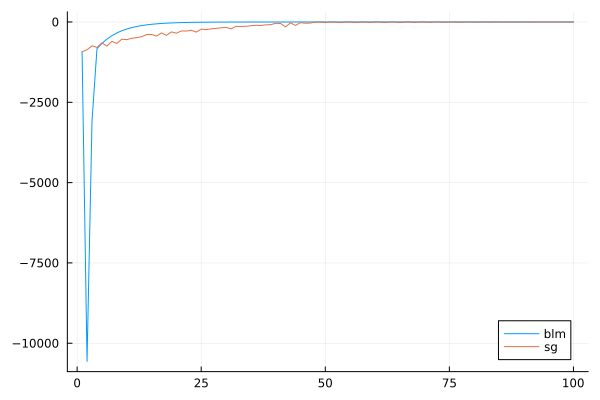

In [57]:
plot(fitblm, label = "blm")
plot!(fsg, label = "sg")

In [ ]:
xcrg, itcrg, fcrg = OPT.ColumnAndRowGeneration(instance, N_ITER, 1e-6)
fcrg = fcrg .- ObjM

In [ ]:
xcg, itcg = OPT.ColumnGeneration(instance, LP_Relax, N_ITER, 1e-6)

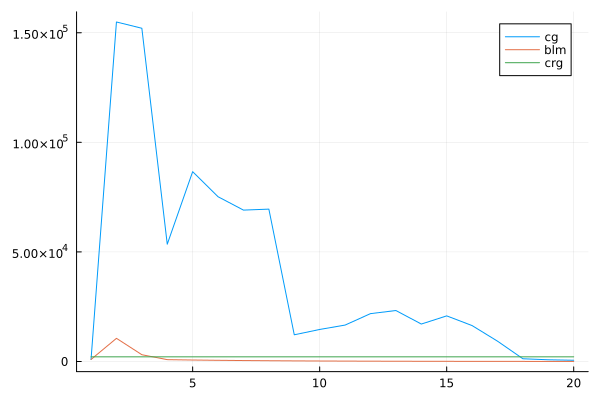

In [200]:
CRGf = []
for x in itcrg
    push!(CRGf, UT.fast_oracle(instance, x)[1] .- ObjM)
end
CGf = []
for x in itcg
    push!(CGf, UT.fast_oracle(instance, x)[1].- ObjM)
end
plot(-CGf, label = "cg")
plot!(-fitblm, label = "blm")
plot!(-CRGf, label = "crg")